In [7]:
pip install pandas matplotlib


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 11.3 MB 9.6 MB/s eta 0:00:01
     |████████████████████████████████| 8.0 MB 16.3 MB/s eta 0:00:01
     |████████████████████████████████| 5.4 MB 29.2 MB/s eta 0:00:01
     |████████████████████████████████| 347 kB 21.2 MB/s eta 0:00:01
     |████████████████████████████████| 509 kB 60.1 MB/s eta 0:00:01
     |████████████████████████████████| 111 kB 36.1 MB/s eta 0:00:01
     |████████████████████████████████| 253 kB 34.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.8 MB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.0 MB 41.8 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 22.4 MB/s eta 0:00:011
You should consider upgrading via the '/usr/local/bin/python3.10 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [13]:

import pandas as pd

file_path = 'setagayasfcjitaku.csv'
df = pd.read_csv(file_path)

# Display the first few rows to understand its structure
df.head()


,Unnamed: 0,SFC,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,jitaku,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,setagaya,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,NaN,1.0,2.0,3.0,4.0,5.0,SUM,1.0,2.0,3.0,4.0,5.0,SUM,1.0,2.0,3.0,4.0,5.0,SUM
1,AS2500,2.0,2.0,6.0,2.0,2.0,14,NaN,1.0,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,0
2,AS38635,2.0,5.0,NaN,2.0,2.0,11,NaN,5.0,NaN,NaN,NaN,5,NaN,3.0,NaN,NaN,NaN,3
3,AS2907,2.0,NaN,NaN,3.0,4.0,9,NaN,NaN,NaN,NaN,NaN,0,NaN,1.0,NaN,NaN,NaN,1
4,AS2497,3.0,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,0


In [16]:
import matplotlib.pyplot as plt

# Clean up and extract relevant data
df_clean = df.iloc[1:].copy()
df_clean.columns = ['AS', 'SFC_1', 'SFC_2', 'SFC_3', 'SFC_4', 'SFC_5', 'SFC_SUM',
                    'jitaku_1', 'jitaku_2', 'jitaku_3', 'jitaku_4', 'jitaku_5', 'jitaku_SUM',
                    'setagaya_1', 'setagaya_2', 'setagaya_3', 'setagaya_4', 'setagaya_5', 'setagaya_SUM']

# Convert numeric columns to float
numeric_cols = df_clean.columns[1:]
df_clean[numeric_cols] = df_clean[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Create a melted DataFrame for distribution plot
df_melted = df_clean.melt(id_vars='AS', value_vars=['SFC_SUM', 'jitaku_SUM', 'setagaya_SUM'],
                          var_name='Location', value_name='Count')

# Drop NaNs
df_melted.dropna(inplace=True)

# Plot
plt.figure(figsize=(12, 6))
for location in df_melted['Location'].unique():
    subset = df_melted[df_melted['Location'] == location]
    plt.hist(subset['Count'], bins=10, alpha=0.5, label=location)

plt.title('AS Rule Distribution per Location (SFC, Jitaku, Setagaya)')
plt.xlabel('Rule Count')
plt.ylabel('Number of AS Entries')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


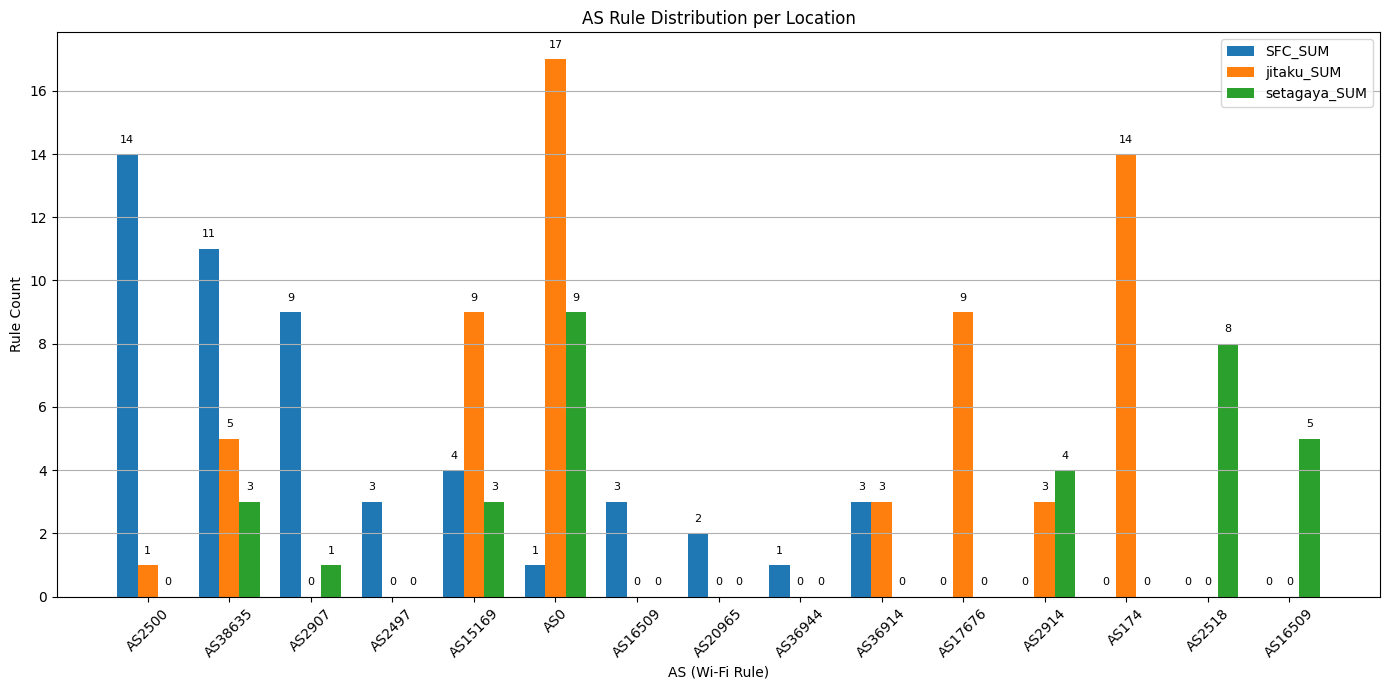

In [17]:
# Plot with value labels on each bar
import numpy as np

# Prepare data for bar chart
summary_df = df_clean[['AS', 'SFC_SUM', 'jitaku_SUM', 'setagaya_SUM']].dropna()
summary_df.set_index('AS', inplace=True)

# Transpose for plotting
summary_df = summary_df.transpose()

# Plot
plt.figure(figsize=(14, 7))
x = np.arange(len(summary_df.columns))
bar_width = 0.25

for i, location in enumerate(summary_df.index):
    plt.bar(x + i * bar_width, summary_df.loc[location], width=bar_width, label=location)
    # Add value labels
    for j, val in enumerate(summary_df.loc[location]):
        plt.text(x[j] + i * bar_width, val + 0.3, str(int(val)), ha='center', va='bottom', fontsize=8)

plt.xticks(x + bar_width, summary_df.columns, rotation=45)
plt.title('AS Rule Distribution per Location')
plt.xlabel('AS (Wi-Fi Rule)')
plt.ylabel('Rule Count')
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


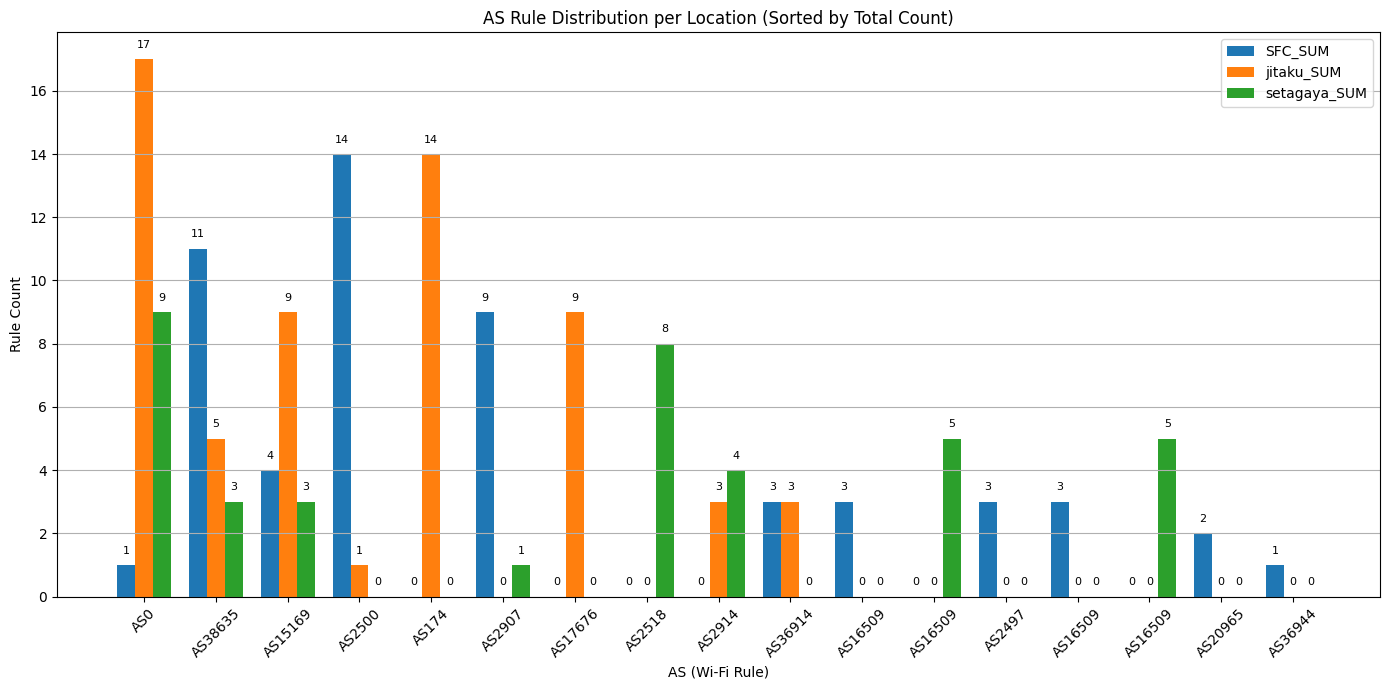

In [18]:
# Sort AS by total rule count (sum across SFC, jitaku, setagaya)
summary_df_sorted = summary_df.loc[:, summary_df.sum(axis=0).sort_values(ascending=False).index]

# Plot again with sorted AS order
plt.figure(figsize=(14, 7))
x = np.arange(len(summary_df_sorted.columns))
bar_width = 0.25

for i, location in enumerate(summary_df_sorted.index):
    plt.bar(x + i * bar_width, summary_df_sorted.loc[location], width=bar_width, label=location)
    for j, val in enumerate(summary_df_sorted.loc[location]):
        plt.text(x[j] + i * bar_width, val + 0.3, str(int(val)), ha='center', va='bottom', fontsize=8)

plt.xticks(x + bar_width, summary_df_sorted.columns, rotation=45)
plt.title('AS Rule Distribution per Location (Sorted by Total Count)')
plt.xlabel('AS (Wi-Fi Rule)')
plt.ylabel('Rule Count')
plt.legend()
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()


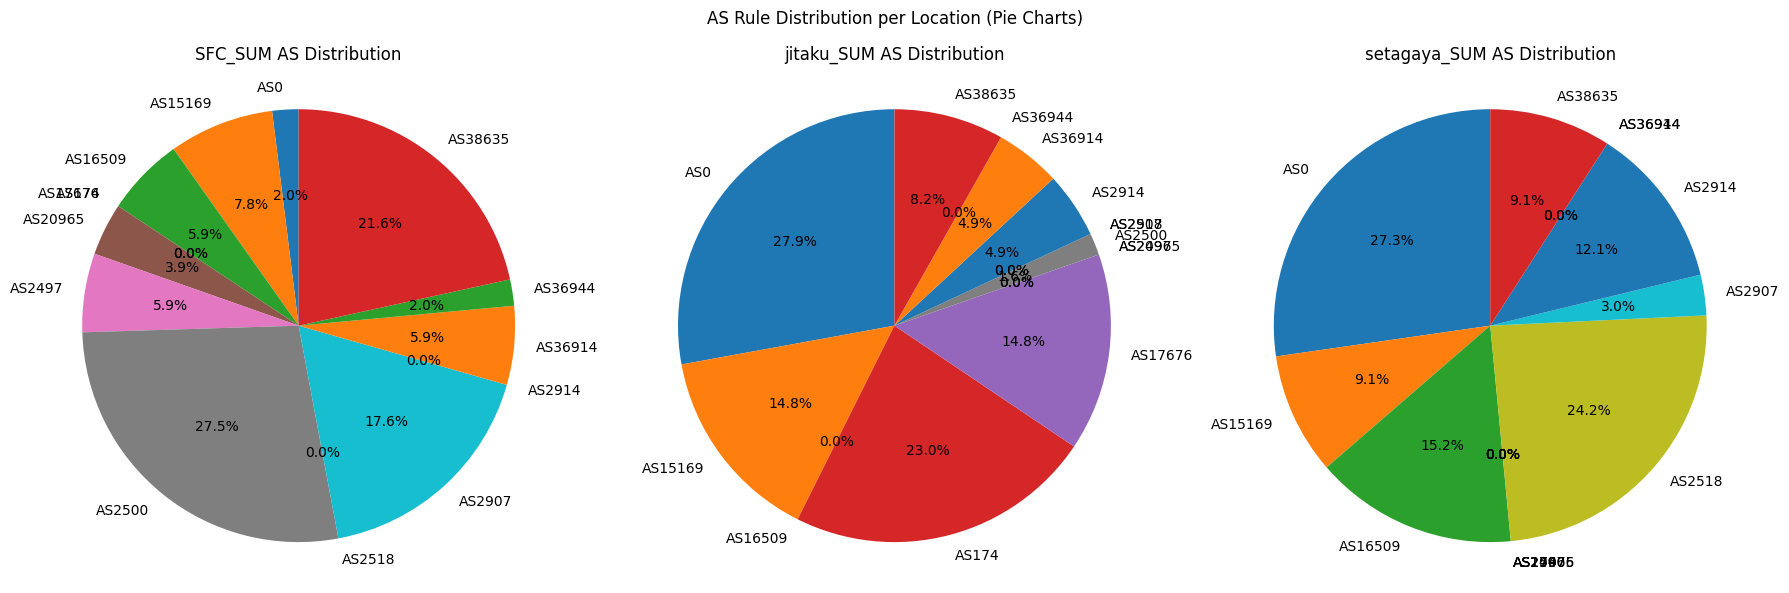

In [20]:
# Prepare data again for static sunburst-like chart
sunburst_data = df_clean[['AS', 'SFC_SUM', 'jitaku_SUM', 'setagaya_SUM']].copy()
sunburst_data = sunburst_data.melt(id_vars='AS', var_name='Location', value_name='Count')
sunburst_data.dropna(inplace=True)

# Aggregate total counts per (Location, AS)
grouped_data = sunburst_data.groupby(['Location', 'AS']).sum().reset_index()

# Create a pie chart for each Location
locations = grouped_data['Location'].unique()

# Plot
fig, axs = plt.subplots(1, len(locations), figsize=(18, 6))

for i, loc in enumerate(locations):
    subset = grouped_data[grouped_data['Location'] == loc]
    axs[i].pie(subset['Count'], labels=subset['AS'], autopct='%1.1f%%', startangle=90)
    axs[i].axis('equal')
    axs[i].set_title(f'{loc} AS Distribution')

plt.suptitle('AS Rule Distribution per Location (Pie Charts)')
plt.tight_layout()
plt.show()


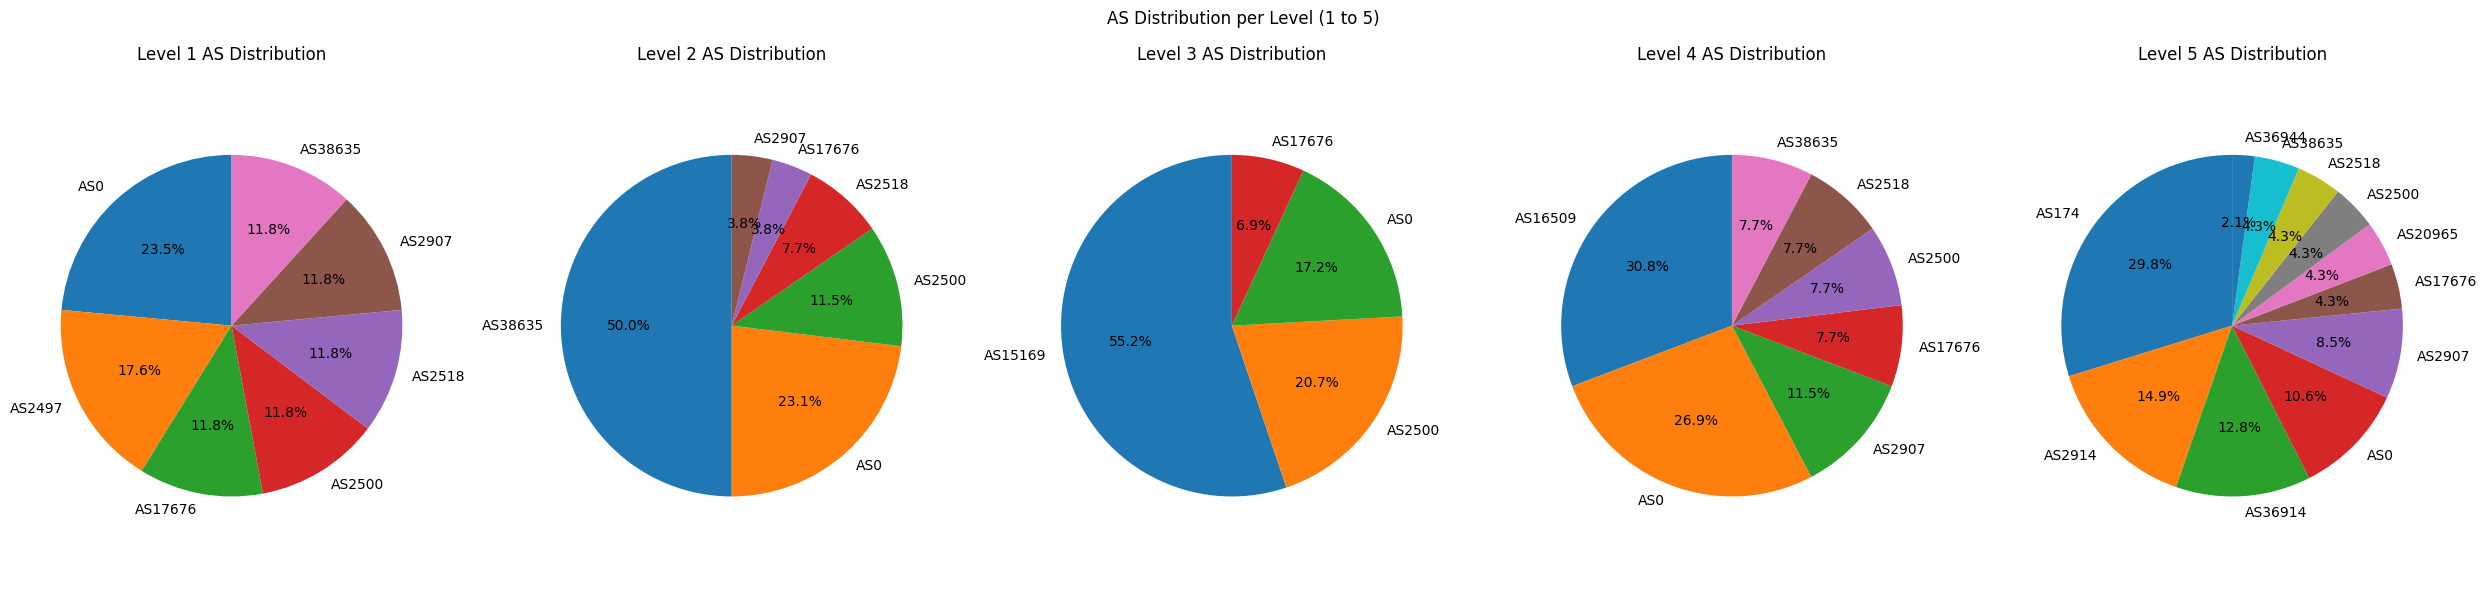

In [21]:
# Prepare data for all levels (1 to 5)
all_levels = {}
for level in range(1, 6):
    level_cols = [f'SFC_{level}', f'jitaku_{level}', f'setagaya_{level}']
    level_df = df_clean[['AS'] + level_cols].copy()
    level_melted = level_df.melt(id_vars='AS', value_vars=level_cols,
                                 var_name='Column', value_name='Count')
    level_melted.dropna(inplace=True)
    level_melted_grouped = level_melted.groupby('AS')['Count'].sum().reset_index()
    level_melted_grouped = level_melted_grouped.sort_values(by='Count', ascending=False)
    all_levels[f'Level {level}'] = level_melted_grouped

# Create pie charts for Level 1 to 5
fig, axs = plt.subplots(1, 5, figsize=(25, 6))

for i, (level_name, data) in enumerate(all_levels.items()):
    axs[i].pie(data['Count'], labels=data['AS'], autopct='%1.1f%%', startangle=90)
    axs[i].axis('equal')
    axs[i].set_title(f'{level_name} AS Distribution')

plt.suptitle('AS Distribution per Level (1 to 5)')
plt.tight_layout()
plt.show()
